In [2]:
import pandas as pd
import os

In [3]:
data_folder = "/home/dertyxx/Documents/stage/network-sniffer/data/"
files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

summary = {}

for file in files:
    file_path = os.path.join(data_folder, file)
    try:
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()
        if 'Label' in df.columns:
            label_counts = df['Label'].value_counts()
            summary[file] = label_counts.to_dict()
        else:
            print(f"Colonne 'Label' non trouvée dans {file}")
    except Exception as e:
        print(f"Erreur avec le fichier {file}: {e}")

for file, labels in summary.items():
    print(f"\n{file}")
    for label, count in labels.items():
        print(f"   {label}: {count} occurrences")


Wednesday-workingHours.pcap_ISCX.csv
   BENIGN: 440031 occurrences
   DoS Hulk: 231073 occurrences
   DoS GoldenEye: 10293 occurrences
   DoS slowloris: 5796 occurrences
   DoS Slowhttptest: 5499 occurrences
   Heartbleed: 11 occurrences

Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
   PortScan: 158930 occurrences
   BENIGN: 127537 occurrences

Monday-WorkingHours.pcap_ISCX.csv
   BENIGN: 529918 occurrences

Friday-WorkingHours-Morning.pcap_ISCX.csv
   BENIGN: 189067 occurrences
   Bot: 1966 occurrences

Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
   DDoS: 128027 occurrences
   BENIGN: 97718 occurrences

Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
   BENIGN: 288566 occurrences

Tuesday-WorkingHours.pcap_ISCX.csv
   BENIGN: 432074 occurrences
   FTP-Patator: 7938 occurrences
   SSH-Patator: 5897 occurrences

Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
   BENIGN: 168186 occurrences
   Web Attack - Brute Force: 1507 occurrences
   Web Attack - XSS:

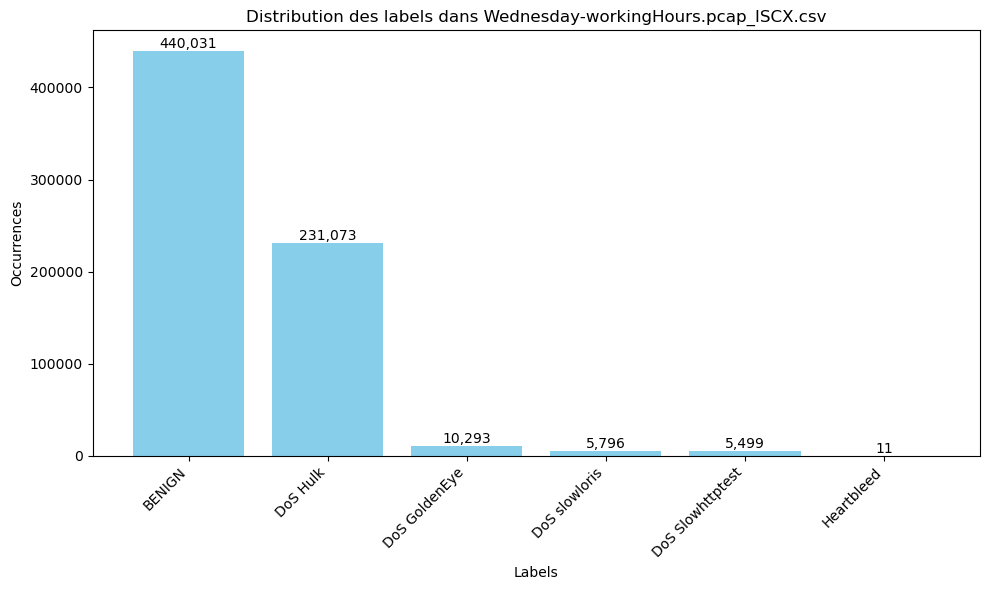

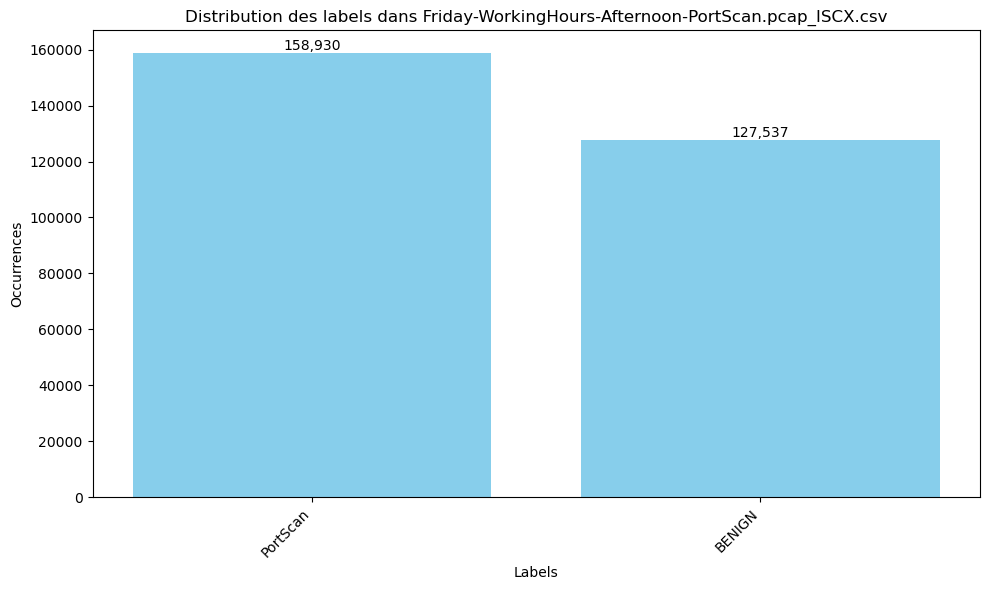

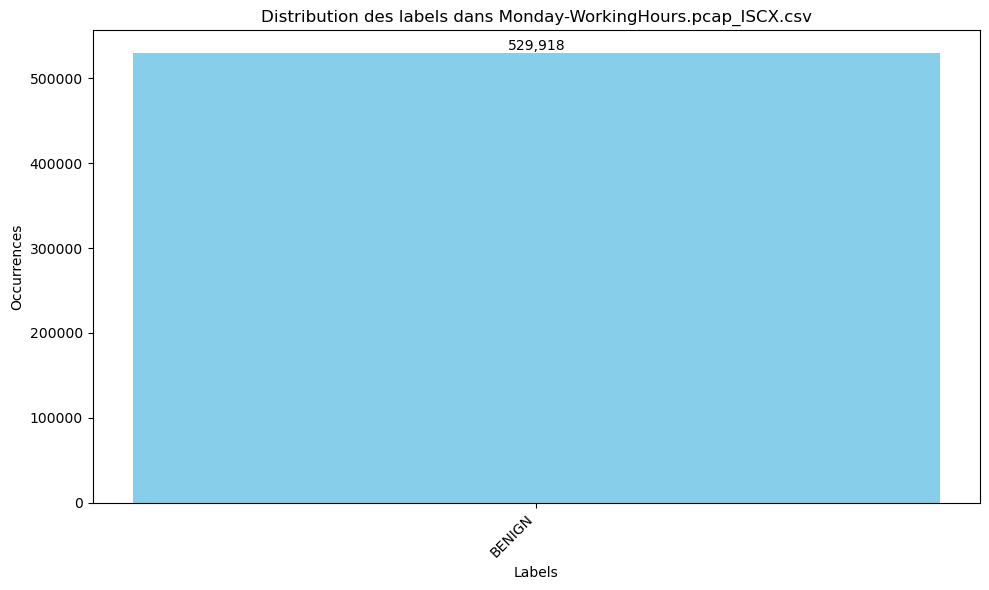

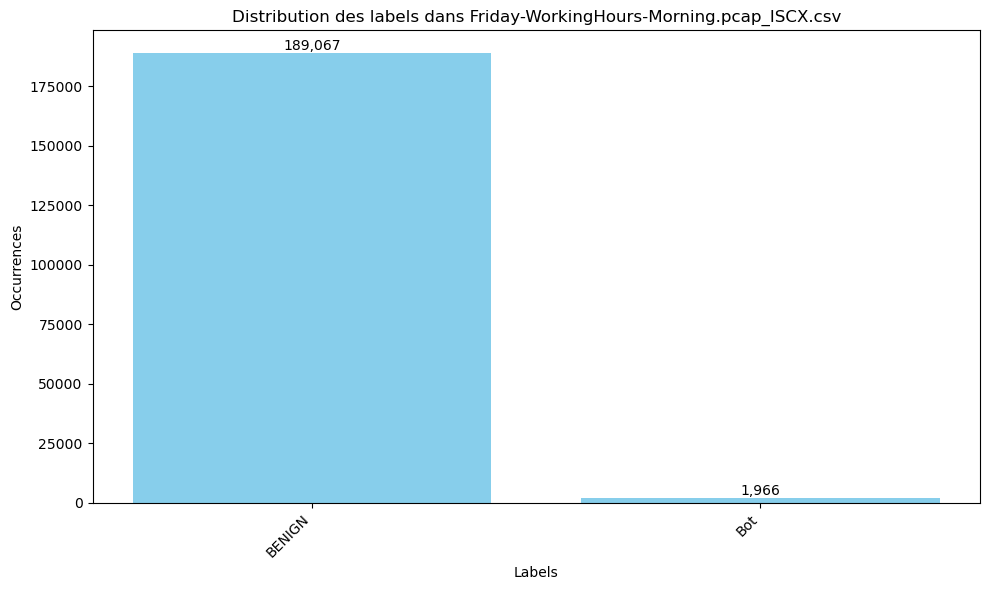

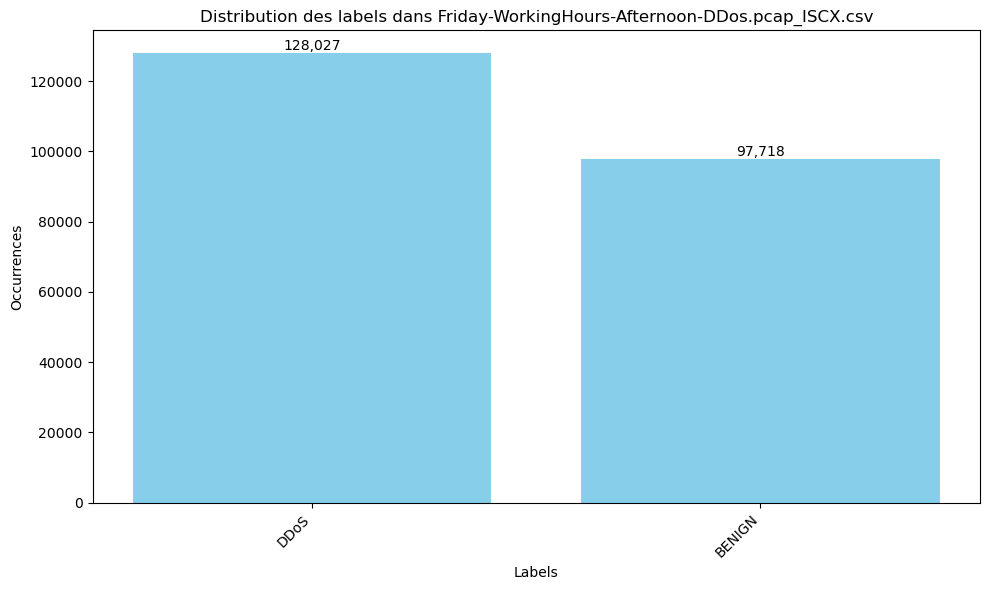

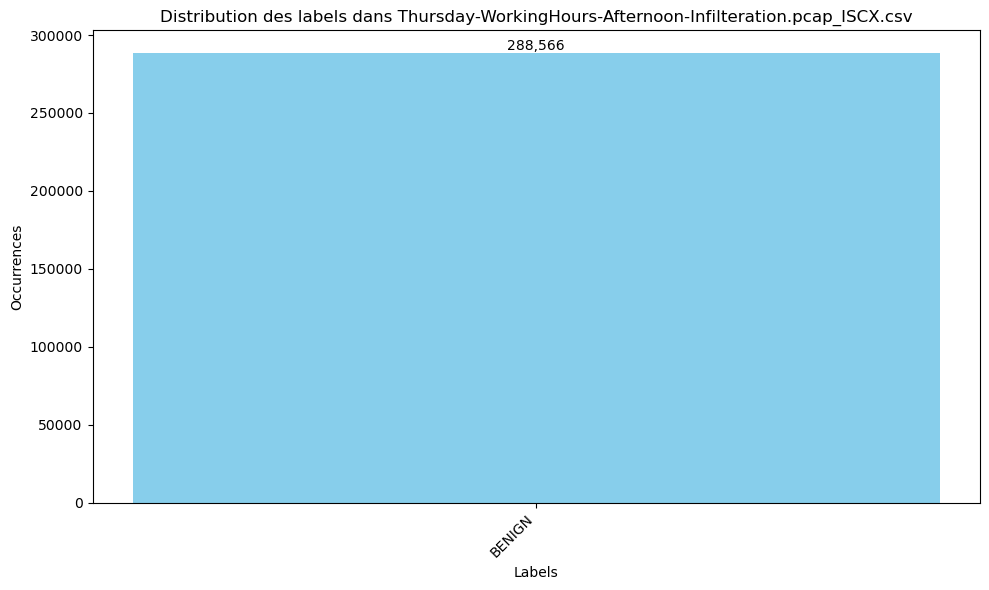

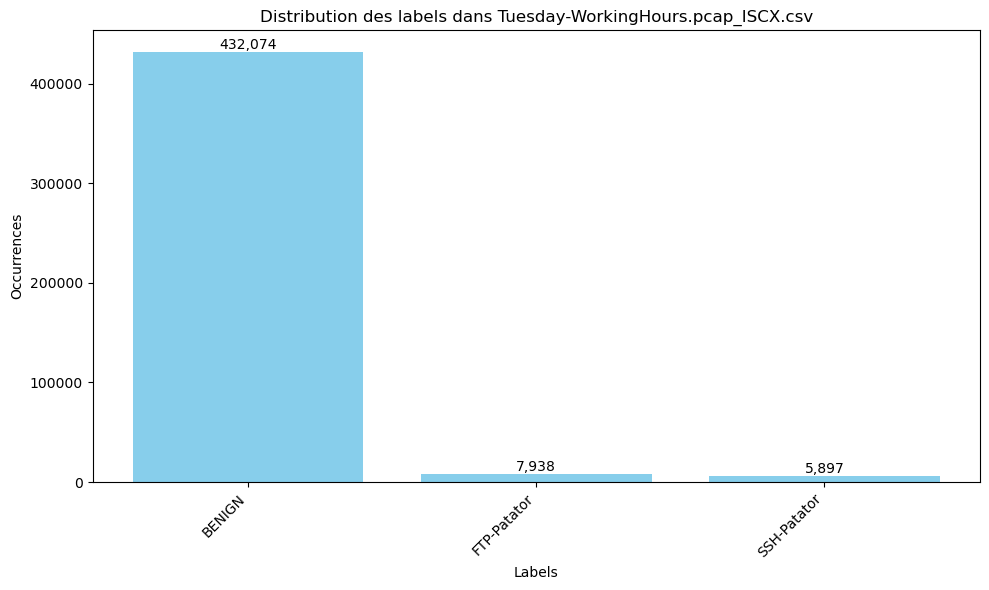

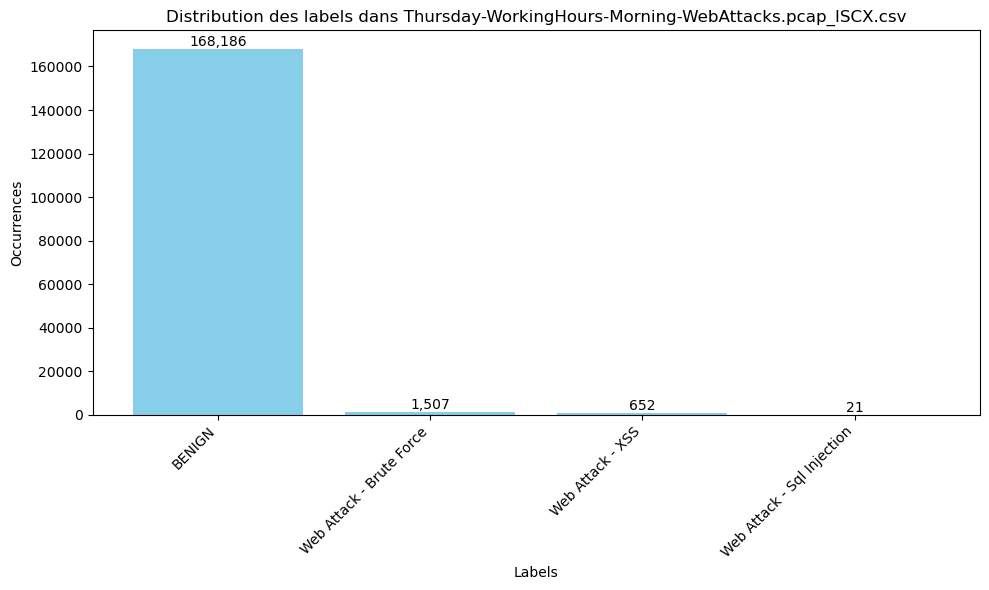

In [2]:
import matplotlib.pyplot as plt

# Données résumées
summary = {
    "Wednesday-workingHours.pcap_ISCX.csv": {
        "BENIGN": 440031,
        "DoS Hulk": 231073,
        "DoS GoldenEye": 10293,
        "DoS slowloris": 5796,
        "DoS Slowhttptest": 5499,
        "Heartbleed": 11
    },
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv": {
        "PortScan": 158930,
        "BENIGN": 127537
    },
    "Monday-WorkingHours.pcap_ISCX.csv": {
        "BENIGN": 529918
    },
    "Friday-WorkingHours-Morning.pcap_ISCX.csv": {
        "BENIGN": 189067,
        "Bot": 1966
    },
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv": {
        "DDoS": 128027,
        "BENIGN": 97718
    },
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv": {
        "BENIGN": 288566
    },
    "Tuesday-WorkingHours.pcap_ISCX.csv": {
        "BENIGN": 432074,
        "FTP-Patator": 7938,
        "SSH-Patator": 5897
    },
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv": {
        "BENIGN": 168186,
        "Web Attack - Brute Force": 1507,
        "Web Attack - XSS": 652,
        "Web Attack - Sql Injection": 21
    }
}

# Création des diagrammes à barres
for file, labels in summary.items():
    plt.figure(figsize=(10,6))
    bars = plt.bar(labels.keys(), labels.values(), color='skyblue')
    
    # Ajouter les valeurs au-dessus des barres
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', 
                 ha='center', va='bottom', fontsize=10)
    
    plt.title(f"Distribution des labels dans {file}")
    plt.xlabel("Labels")
    plt.ylabel("Occurrences")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [4]:
file_path = "/home/dertyxx/Documents/stage/network-sniffer/data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
df_temp = pd.read_csv(file_path)

df_temp.columns = df_temp.columns.str.strip()
df_temp['Label'] = df_temp['Label'].str.replace('�', '-', regex=True)

print(df_temp['Label'].value_counts())

df_temp.to_csv(file_path, index=False)
print(f"Fichier {file_path} traité avec succès.")

Label
BENIGN                        168186
Web Attack - Brute Force        1507
Web Attack - XSS                 652
Web Attack - Sql Injection        21
Name: count, dtype: int64
Fichier /home/dertyxx/Documents/stage/network-sniffer/data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv traité avec succès.


Retirer toutes les lignes où le label est 'Infiltration'

In [5]:
file_path = "/home/dertyxx/Documents/stage/network-sniffer/data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"  # Remplace par le nom de ton fichier

df_temp2 = pd.read_csv(file_path)

df_temp2.columns = df_temp2.columns.str.strip()
df_temp2 = df_temp2[df_temp2['Label'] != 'Infiltration']
print(df_temp2['Label'].value_counts(sort=True).to_string())

df_temp2.to_csv(file_path, index=False)
print("Lignes avec le label 'Infiltration' supprimées.")

Label
BENIGN    288566
Lignes avec le label 'Infiltration' supprimées.


In [ ]:
import os
import pandas as pd

data_folder = "/home/dertyxx/Documents/stage/network-sniffer/data/"
files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]
output_file = os.path.join(data_folder, "processed_file.csv")


# Label mapping function
def map_label(label):
    label_map = {
        'BENIGN': 'BENIGN',
        'Portscan': 'Portscan',
        'Bot': 'Bot',
        'FTP-Patator': 'Patator',
        'SSH-Patator': 'Patator',
        'DDoS': 'DOS/DDOS',
        'DoS Hulk': 'DOS/DDOS',
        'DoS GoldenEye': 'DOS/DDOS',
        'DoS slowloris': 'DOS/DDOS',
        'DoS Slowhttptest': 'DOS/DDOS',
        'Heartbleed': 'DOS/DDOS'
    }
    if isinstance(label, str) and label.startswith('Web Attack'):
        return 'WebAttack'
    return label_map.get(label, label)

first = True
label_counts = {}

# Remove output file if it exists
if os.path.exists(output_file):
    os.remove(output_file)

for file in files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()

    if 'Label' in df.columns:
        df['mapped_label'] = df['Label'].apply(map_label)

        # Count labels for summary
        for lbl, count in df['mapped_label'].value_counts().items():
            label_counts[lbl] = label_counts.get(lbl, 0) + count

        df.to_csv(output_file, mode='a', header=first, index=False)
        first = False
    else:
        print(f"Warning: 'Label' column is missing in {file}")

# Print label summary
if label_counts:
    sorted_counts = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
    print("Label summary:")
    for lbl, count in sorted_counts:
        print(f"{lbl}: {count}")
    print(f"\nFile '{output_file}' processed successfully.")
else:
    print("No valid files found.")


Label summary:
BENIGN: 2318418
DOS/DDOS: 384861
PortScan: 158930
Patator: 13835
WebAttack: 2180
Bot: 1966

File '/home/dertyxx/Documents/stage/network-sniffer/data/processed_file.csv' processed successfully.


In [1]:
import pandas as pd
import os

input_file = '/home/dertyxx/Documents/stage/network-sniffer/data/processed_file.csv'
output_file = '/home/dertyxx/Documents/stage/network-sniffer/data/processed_file_cleaned.csv'
chunksize = 10000

# Handle NaN and Inf values (replace or drop rows)
print("Cleaning rows with NaN or Inf values...")

if os.path.exists(output_file):
    os.remove(output_file)

first = True
total_rows_before = 0
total_rows_after = 0

for chunk in pd.read_csv(input_file, chunksize=chunksize, low_memory=False):
    total_rows_before += len(chunk)
    
    # Replace inf values with NaN, then drop rows with any NaN
    chunk = chunk.replace([float('inf'), -float('inf')], float('nan')).dropna()
    
    total_rows_after += len(chunk)
    
    chunk.to_csv(output_file, mode='a', header=first, index=False)
    first = False

print(f"Rows before cleaning: {total_rows_before}")
print(f"Rows after cleaning: {total_rows_after}")

print("\nCleaning complete. Output saved to:", output_file)


Cleaning rows with NaN or Inf values...
Rows before cleaning: 2890185
Rows after cleaning: 2827840

Cleaning complete. Output saved to: /home/dertyxx/Documents/stage/network-sniffer/data/processed_file_cleaned.csv
Rows before cleaning: 2890185
Rows after cleaning: 2827840

Cleaning complete. Output saved to: /home/dertyxx/Documents/stage/network-sniffer/data/processed_file_cleaned.csv


In [4]:
# affichier le nombre de colonnes dans le fichier de sortie
output_file = '/home/dertyxx/Documents/stage/network-sniffer/data/processed_file_cleaned.csv'
with open(output_file, 'r') as f:
    header = f.readline().strip().split(',')
    column_count = len(header)
print(f"Nombre de colonnes dans le fichier: {column_count}")

Nombre de colonnes dans le fichier: 80
